<a href="https://colab.research.google.com/github/eodnjsdl21/Tutoring/blob/main/predict_bus_scedual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/버스운행 /train.csv")
df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [ ]:
fearture = df.drop("next_arrive_time", axis =1)
target = df["next_arrive_time"]

In [ ]:
fearture

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068


In [ ]:
target = df["next_arrive_time"]

target

0         24
1         36
2         40
3         42
4         64
          ..
210452    96
210453    50
210454    16
210455    38
210456    24
Name: next_arrive_time, Length: 210457, dtype: int64

In [ ]:
df.columns

Index(['id', 'date', 'route_id', 'vh_id', 'route_nm', 'now_latitude',
       'now_longitude', 'now_station', 'now_arrive_time', 'distance',
       'next_station', 'next_latitude', 'next_longitude', 'next_arrive_time'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegressionfrom sklearn.metrics import mean_squared_error 

In [ ]:
X = df[['route_id', 'vh_id', 'now_latitude', 'now_longitude', 'distance']]
y = df['next_arrive_time']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)#트래이을 모델을 학습한다.  -> train test도학습된다. 

LinearRegression()

In [ ]:
y_pred = model.predict(X_test) #실제 x로 예측을 해본다. 
#테스트로 예측한다

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred) #테스트와 예측값을 비교한다.
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 5469.331557244776
R-squared: 0.23705221929890652


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 데이터프레임의 기본 정보 확인
print(df.info())

# 데이터프레임의 각 열의 통계적 특성 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  object 
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  object 
 8   now_arrive_time   210457 non-null  object 
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  object 
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 22.5+ MB
None
                  id      route_id         vh_id   no

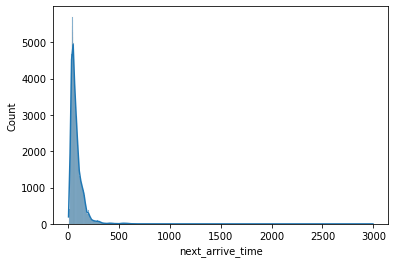

In [ ]:
# Plot the distribution of the target variable
sns.histplot(data=df, x='next_arrive_time', kde=True)
plt.show()

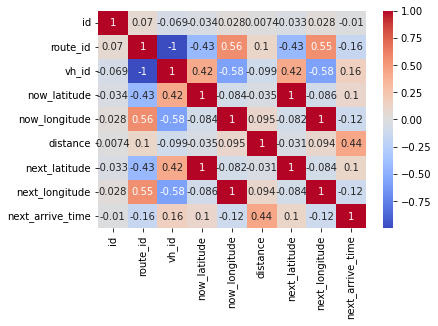

In [ ]:
# Display the correlation matrix between features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [ ]:
import datetime

# Convert all values in the 'now_arrive_time' column to datetime objects
df['now_arrive_time'] = pd.to_datetime(df['now_arrive_time'].str.replace('시', ':00'), format='%H:%M')

AttributeError: ignored

In [ ]:
df

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,1900-01-01 06:00:00,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,1900-01-01 06:00:00,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,1900-01-01 06:00:00,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),1900-01-01 06:00:00,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,1900-01-01 07:00:00,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,1900-01-01 21:00:00,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,1900-01-01 21:00:00,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,1900-01-01 21:00:00,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,1900-01-01 21:00:00,223.0,평생학습관,33.249504,126.558068,38


In [ ]:
X = df.drop(['id', 'next_latitude', 'next_longitude'], axis=1)

In [ ]:
X =df.drop(['now_station', 'next_latitude', 'next_longitude'], axis=1)

,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_arrive_time
0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,1900-01-01 06:00:00,266.0,제대마을,24
1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,1900-01-01 06:00:00,333.0,제대아파트,36
2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,1900-01-01 06:00:00,415.0,제주대학교,40
3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),1900-01-01 06:00:00,578.0,제주여자중고등학교(아라방면),42
4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,1900-01-01 07:00:00,374.0,은남동,64
...,...,...,...,...,...,...,...,...,...,...,...
210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,1900-01-01 21:00:00,528.0,삼아아파트,96
210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,1900-01-01 21:00:00,280.0,매일올레시장 7번입구,50
210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,1900-01-01 21:00:00,114.0,아랑조을거리 입구,16
210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,1900-01-01 21:00:00,223.0,평생학습관,38


In [ ]:
# Handle missing data
df = df.dropna()

In [ ]:
# Remove outliers
q1 = df['now_arrive_time'].quantile(0.25)
q3 = df['now_arrive_time'].quantile(0.75)
iqr = q3 - q1
df = df[(df['now_arrive_time'] >= q1 - 1.5*iqr) & (df['now_arrive_time'] <= q3 + 1.5*iqr)]

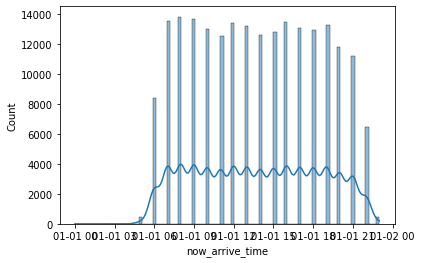

In [ ]:
# Plot the distribution of the target variable
sns.histplot(data=df, x='now_arrive_time', kde=True)
plt.show()

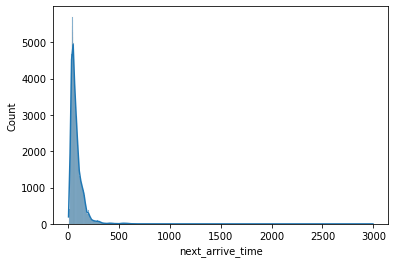

In [ ]:
sns.histplot(data=df, x='next_arrive_time', kde=True)
plt.show()

In [ ]:
# Remove outliers
q1 = df['next_arrive_time'].quantile(0.25)
q3 = df['next_arrive_time'].quantile(0.75)
iqr = q3 - q1
df = df[(df['next_arrive_time'] >= q1 - 1.5*iqr) & (df['next_arrive_time'] <= q3 + 1.5*iqr)]

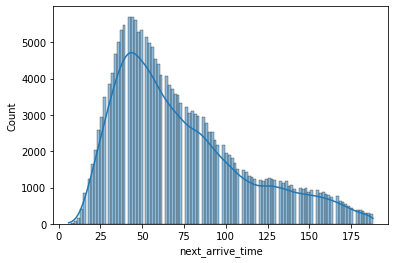

In [ ]:
sns.histplot(data=df, x='next_arrive_time', kde=True)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale the 'next_arrive_time' feature using MinMaxScaler
scaler = MinMaxScaler()
df['next_arrive_time'] = scaler.fit_transform(df[['next_arrive_time']])

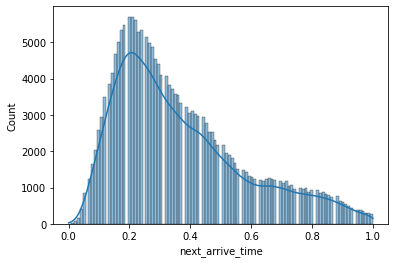

In [ ]:
sns.histplot(data=df, x='next_arrive_time', kde=True)
plt.show()

In [ ]:
categorical_vars = []
for col in df.columns:
    if df[col].dtype == 'object' and len(df[col].unique()) < len(df[col]):
        categorical_vars.append(col)

print(categorical_vars)

['date', 'route_nm', 'now_station', 'next_station']


In [ ]:
df.columns

Index(['id', 'date', 'route_id', 'vh_id', 'route_nm', 'now_latitude',
       'now_longitude', 'now_station', 'now_arrive_time', 'distance',
       'next_station', 'next_latitude', 'next_longitude', 'next_arrive_time'],
      dtype='object')

In [ ]:
#스케일러 모든게 단위가 다르기 때문이다.


from sklearn.preprocessing import MinMaxScaler

# Identify numeric features to scale
numeric_vars = ['now_latitude', 'now_longitude', 'next_latitude', 'next_longitude', 'distance']

# Scale the numeric features using MinMaxScaler
scaler = MinMaxScaler()
df[numeric_vars] = scaler.fit_transform(df[numeric_vars])